In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.image as mpimg
import pydicom
import time

In [3]:
PATH = "D:\\master-thesis\\"

In [136]:
file = pydicom.read_file('IM100')
img = file.pixel_array
img = np.array(img)
data = img/(np.max(img)-np.min(img))

In [137]:
pi = np.pi

In [138]:
img_size = len(img)

In [215]:
center = np.array([100,250])
width = 10

In [216]:
def initial_curve(center, width, img_row, img_col):
    initial_map = np.zeros((img_row,img_col))
    for i in range((img_row)):
        for j in range((img_col)):
            initial_map[i][j] = np.sqrt((i-center[0])**2+(j-center[1])**2)-width
#     initial_map = initial_map/(np.max(initial_map)-np.min(initial_map))
    return initial_map

In [217]:
def force(image,s_gradient, mean1, mean2):
    
    edge_constrain = 1/(1+s_gradient)
    f1 = (image-mean1)**2
    f2 = (image-mean2)**2
    eps = 1e-10
#     print('passed')
    return (1/2+f1*edge_constrain)/((1+(f1+f2)*edge_constrain+2*eps)), (1/2+f2*edge_constrain)/((1+(f1+f2)*edge_constrain+2*eps)) 

In [218]:
def delta(phi):
#     print('RRR')
    return 1/pi*(0.5/(phi**2+0.5**2))

In [219]:
def gradient_square(img):
    return (np.gradient(img)[1])**2+(np.gradient(img)[0])**2

In [220]:
def K(phi):
    phi_x = np.gradient(phi)[1]
    phi_y = np.gradient(phi)[0]
    phi_xx = np.gradient(phi_x)[1]
    phi_xy = np.gradient(phi_x)[0]
    phi_yy = np.gradient(phi_y)[0]
    
    return (phi_xx * phi_y**2 + phi_yy * phi_x**2 -2* phi_xy * phi_y*phi_x)/((phi_x**2 + phi_y**2)**(3/2)+1e-10) 

In [221]:
def narrow(phi):
    phi[abs(phi)<10] = 0
    return phi

In [222]:
start = time.time()

print(start)

1557158583.0122125


In [231]:
from skimage import io
img = io.imread(PATH+'egle.png', as_gray=True)
# data = img/(np.max(img)-np.min(img))
img_row = len(img)
img_col = len(img[0])


In [264]:


phi = narrow(initial_curve(center, width, img_row, img_col))
phi = phi/(np.max(phi)-np.min(phi))
start = time.time()
energy = []
mean_1 = []
mean_2 = []
for t in range(0,100001):
#     phi = narrow(phi)
    c1 = np.mean(img[(phi>0 )])
    mean_1.append(c1)
    c2 = np.mean(img[(phi<0 )])
    mean_2.append(c2)
#     area1 = np.sum((phi>0).astype(int))
#     area2 = np.sum((phi<0).astype(int))
    
#   f1, f2 = force(data, gradient_square(img), c1, c2)
    
#     if t %50 == 0 :
#     print('c1 = ',c1)
#     print('c2 = ',c2)
# #         print('kappa = ', np.max(K(phi)))
# #         print('del phi = ', np.max(np.abs(phi_t-phi)))
#         plt.clf()
#         plt.imshow(img*((phi>=0).astype(int)),cmap = plt.cm.bone)
#         plt.show()
# #     print(f1)
#     print('var1 = ',np.std(img[phi>0]))
#     print('var2 = ',np.std(img[phi<=0]))
    f1 = (img-c1)**2
    f2 = (img-c2)**2
    regu = K(phi)
    delt =  delta(phi)
    phi_t = phi + (1*delt*(-f1+f2+1e-5*regu))
    energy.append(np.sum(1*f1+1*f2+0.0001*delt*gradient_square(phi)))
    c1_new = np.mean(img[phi_t>0])
    c2_new = np.mean(img[phi_t<0])
#     phi_t = np.sign(phi_t)*(1-np.abs(gradient_square(phi_t))**(0.5))
    
#     if t%30 == 0:
#         plt.clf()
# # #         ax = plt.figure()
#         plt.imshow(-1*img,cmap = plt.cm.bone)
#         plt.contour(phi,[0],colors='r',linewidths = 0.5) 
#         plt.axis('image')
#         print(error)

# # #         plt.savefig('contour_at_time_'+str(t)+'.png', cmap = plt.cm.bone, dpi = 500)
# # #         print(plt.contour(phi,[0]))
#         plt.show()
    error = np.sum(np.abs(phi-phi_t)**2)**(1/2)/(img_col*img_row)
    if t > 0:
        if error<3*1e-5:
            break    
    c1 = c1_new
    c2 = c2_new
    phi = phi_t
end = time.time()
print(t)
print(end-start)

33
3.83528995513916


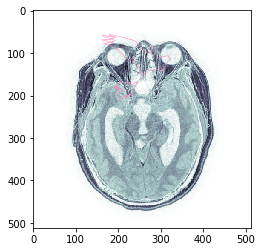

In [248]:
from skimage import io
img_120 = io.imread('IM120.png', as_gray=False)[:,:,0:3]
plt.imshow(img_120)
# plt.imshow(-1*img,cmap = plt.cm.bone)
plt.contour(phi,[0],colors='#ff80c0',linewidths = 0.5) 
plt.axis('image')
#         plt.savefig('contour_at_time_'+str(t)+'.png', cmap = plt.cm.bone, dpi = 500)
#         print(plt.contour(phi,[0]))
plt.savefig('CV_contour_map.png', dpi=300)

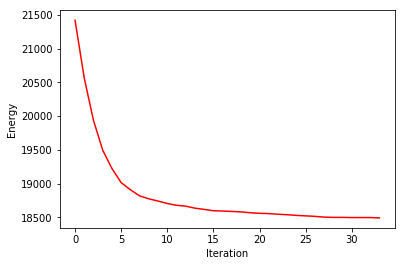

In [265]:
plt.plot(energy,'r')
# plt.plot(mean_2, 'b')
plt.xlabel('Iteration')
plt.ylabel('Energy')
# plt.savefig('Energy_CV.png', dpi = 500)
plt.show()

In [266]:
c_1 = np.mean(img*((phi>=0).astype(int)))

In [267]:
c_1

0.37188144290948033

In [268]:
c_2 = np.mean(img*((phi<=0).astype(int)))

In [269]:
c_2

0.002406212191808673

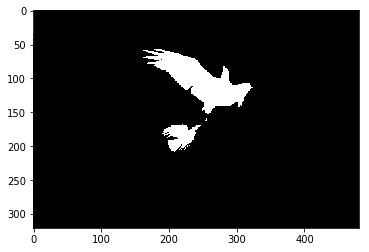

In [270]:
restore = np.zeros((img_row, img_col))
restore[(phi>=0)] = -c_1
restore[(phi<0)] = -c_2
plt.clf()
plt.imshow(restore, cmap = plt.cm.bone)
# plt.imsave( 'CV_method.png',restore, dpi = 500)
plt.show()

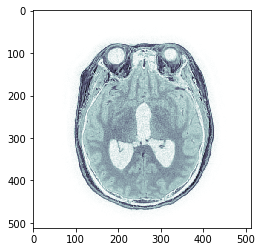

In [156]:
from skimage import io
img_120 = io.imread('IM120.png', as_gray=False)[:,:,0:3]
plt.imshow(img_120)

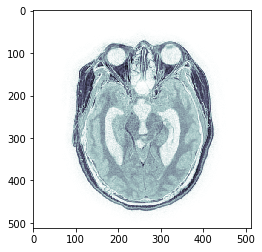

In [157]:
plt.clf()
plt.imshow(-1*img, cmap = plt.cm.bone)
plt.imsave('IM120.png',-1*img, cmap = plt.cm.bone, dpi = 500)
plt.show()

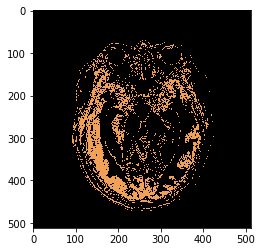

In [158]:
img_120[phi>0] = [241,160,88]
img_120[phi<0] = [0,0,0]
img_120[img<350] = [0,0,0]
plt.imshow(img_120)
plt.imsave('Chan-Vese_region_result.png', img_120)

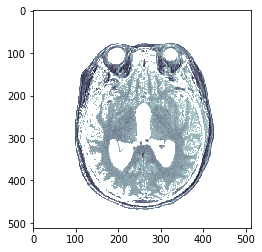

In [85]:
plt.clf()
plt.imshow(-1*img*((phi<0).astype(int)), cmap = plt.cm.bone)
plt.imsave( 'result_CV_model_region2.png',img*((phi<0).astype(int)),cmap = plt.cm.bone,  dpi = 500)
plt.show()

In [86]:
a = np.array([12,3,5,3,2,4,2])

In [87]:
(a>5 & a<7)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()